In [31]:
import pandas as pd
from matplotlib import pyplot as plt
import random
import numpy as np
import math
import importlib
import mcmc_functions
import re
importlib.reload(mcmc_functions)

from mcmc_functions import *
import importlib

seasons_missing_df = pd.read_csv('/Users/josephsun/Desktop/M4R/code/premier-league-matches.csv')
tables_df = pd.read_csv('/Users/josephsun/Desktop/M4R/code/pl-tables-1993-2024.csv')
recent_df = pd.read_csv('matches.csv')
recent_df = recent_df[recent_df['Venue'] == 'Home']

In [32]:
converted_recent_df = convert_match_data(recent_df)
converted_recent_df = converted_recent_df.sort_values(by='Wk').reset_index(drop=True)

# Apply to the 'Home' column
converted_recent_df['Home'] = converted_recent_df['Home'].apply(insert_space)
converted_recent_df['Home'] = converted_recent_df['Home'].replace('Brightonand Hove Albion', 'Brighton')
converted_recent_df['Home'] = converted_recent_df['Home'].replace('Manchester United', 'Manchester Utd')
converted_recent_df['Home'] = converted_recent_df['Home'].replace('Newcastle United', 'Newcastle Utd')
converted_recent_df['Home'] = converted_recent_df['Home'].replace('Nottingham Forest', "Nott'ham Forest")
converted_recent_df['Home'] = converted_recent_df['Home'].replace('Sheffield United', 'Sheffield Utd')
converted_recent_df['Home'] = converted_recent_df['Home'].replace('Tottenham Hotspur', 'Tottenham')
converted_recent_df['Home'] = converted_recent_df['Home'].replace('West Ham United', 'West Ham')
converted_recent_df['Home'] = converted_recent_df['Home'].replace('Wolverhampton Wanderers', 'Wolves')

seasons_df = pd.concat([seasons_missing_df, converted_recent_df], ignore_index=True)

In [33]:
full_strength_dict, full_parameters, full_acceptance_counters, full_tracked_parameters, full_strength_dict_original, full_parameters_original = (
mcmc(seasons_df, 2013, 2024, burn_in = 20000, iterations = 40000, k = True))

In [26]:
full_acceptance_counters


{'Strength': {'accepted': 21096, 'total': 32103},
 'Home Advantage': {'accepted': 29,
  'total': 1618,
  'percentage': 1.792336217552534},
 'Away Advantage': {'accepted': 40,
  'total': 1546,
  'percentage': 2.58732212160414},
 'Mu_P': {'accepted': 30, 'total': 1553, 'percentage': 1.9317450096587252},
 'Sigma_P': {'accepted': 30, 'total': 1553, 'percentage': 1.9317450096587252},
 'Eta': {'accepted': 25, 'total': 1592, 'percentage': 1.5703517587939697},
 'Sigma_S': {'accepted': 25, 'total': 1592, 'percentage': 1.5703517587939697},
 'k': {'accepted': 209, 'total': 1588, 'percentage': 13.161209068010077}}

/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:717: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  joined_df['Strength History'] = joined_df.values.tolist()


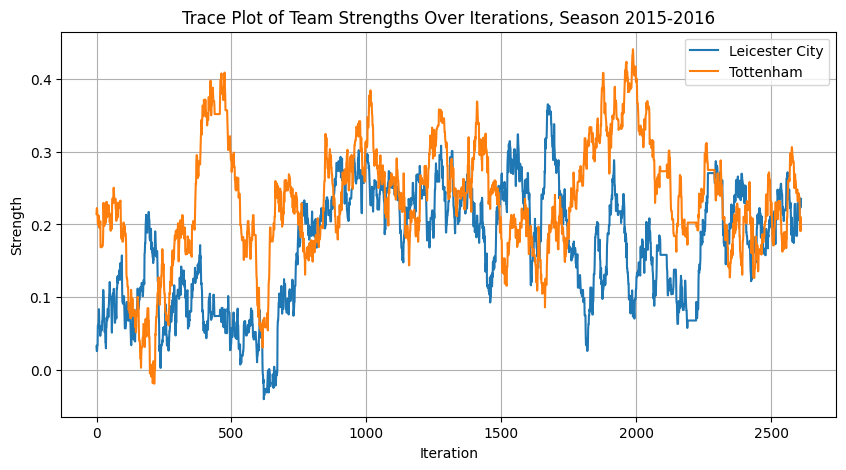

In [27]:
trace_plot_strength(full_strength_dict, ['Leicester City', 'Tottenham'], 2016)

/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:717: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  joined_df['Strength History'] = joined_df.values.tolist()
/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:717: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  joined_df['Strength History'] = joined_df.values.tolist()


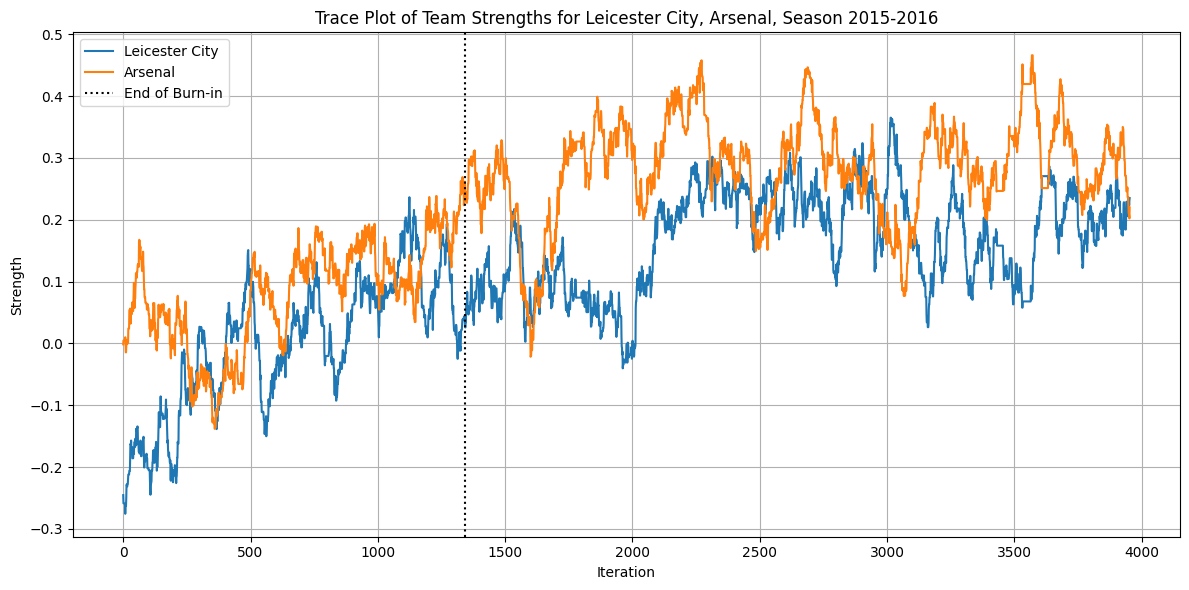

In [6]:
trace_plot_strength_with_burnin(full_strength_dict, full_strength_dict_original, ['Leicester City', 'Arsenal'], 2016)

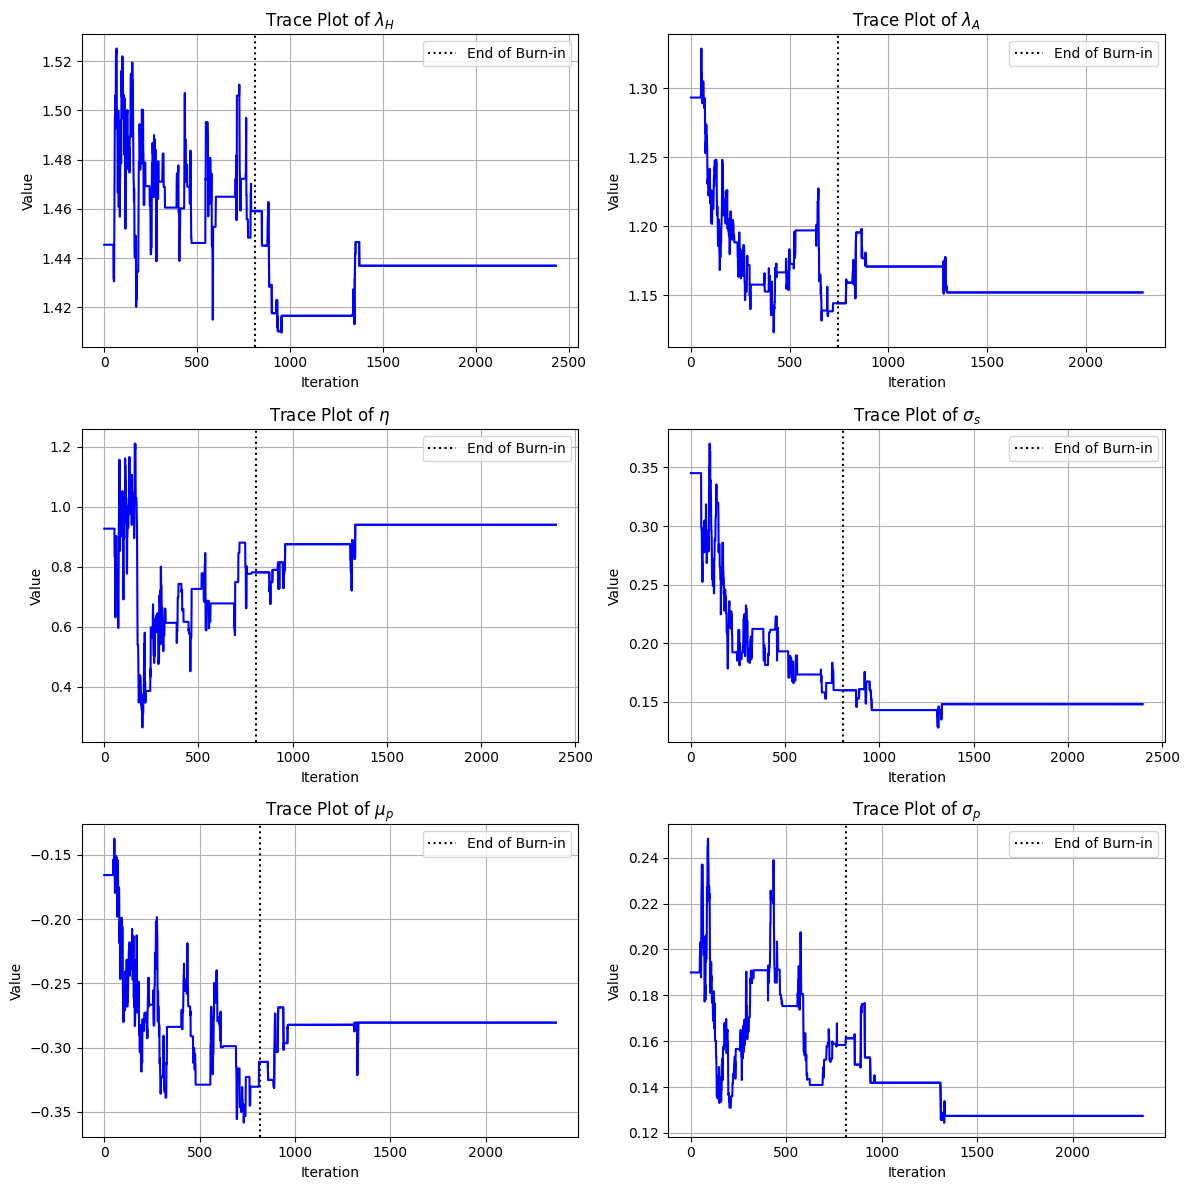

In [7]:
trace_plot_parameter_with_burnin(full_parameters, full_parameters_original)

/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:717: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  joined_df['Strength History'] = joined_df.values.tolist()


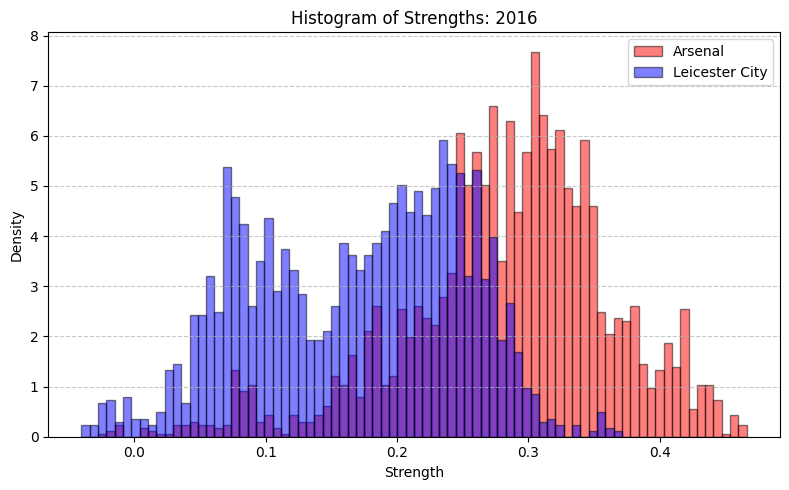

In [11]:
strength_histogram(full_strength_dict, ['Arsenal', 'Leicester City'], 2016, colours = ['Red', 'Blue'], bins = 80)

/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:717: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  joined_df['Strength History'] = joined_df.values.tolist()


Arsenal's strength was greater than Leicester City's strength in 86.52373660030628% of the iterations


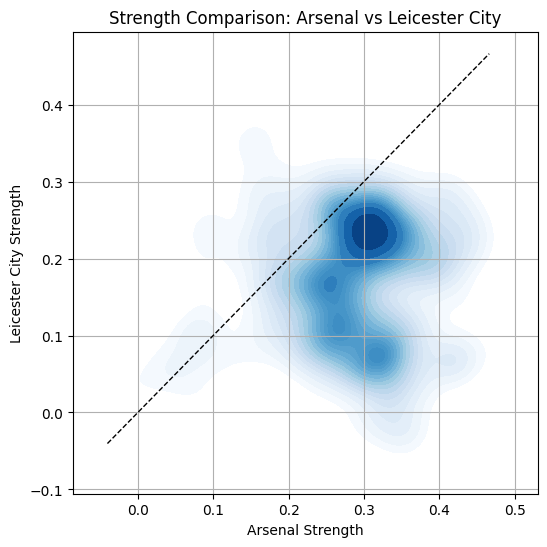

In [10]:
comparison_plot(full_strength_dict, 'Arsenal', 'Leicester City', 2016)

/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:715: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  joined_df['Strength History'] = joined_df.values.tolist()


Effective Sample Size for Leicester City: 51.86 out of 5680


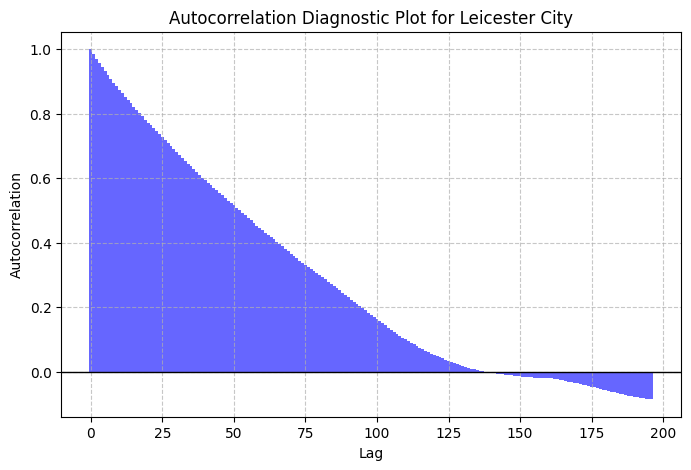

[np.float64(1.0),
 np.float64(0.9853407362587413),
 np.float64(0.9711809529722736),
 np.float64(0.9572628532295373),
 np.float64(0.9443352008815376),
 np.float64(0.9320518053662742),
 np.float64(0.9197276517255362),
 np.float64(0.9078730800418459),
 np.float64(0.8964865843011833),
 np.float64(0.8853327014216769),
 np.float64(0.8743199124455082),
 np.float64(0.8636110058220344),
 np.float64(0.853000003880505),
 np.float64(0.8422665789572577),
 np.float64(0.8318868765430253),
 np.float64(0.8212717749320744),
 np.float64(0.8111572848510624),
 np.float64(0.8014282604855826),
 np.float64(0.7916251981499787),
 np.float64(0.7820694017819926),
 np.float64(0.7728472779628197),
 np.float64(0.7638331376137467),
 np.float64(0.7545496705291526),
 np.float64(0.7451542965956335),
 np.float64(0.736152484536087),
 np.float64(0.7269430271298368),
 np.float64(0.7175458359959379),
 np.float64(0.7082201896121239),
 np.float64(0.6995295703165616),
 np.float64(0.690284214655087),
 np.float64(0.68076739339769

In [11]:
autocorrelation_plot(full_strength_dict, 'Leicester City', 2016)

In [14]:

def subtract_prob_dfs(prob_df1, prob_df2):
    """
    Subtract two formatted prob_df tables from goal_summary, including marginals.

    Returns a new DataFrame with the same structure.
    """
    # Ensure same structure
    if not prob_df1.columns.equals(prob_df2.columns):
        raise ValueError("prob_df columns do not match")
    if not prob_df1.index.equals(prob_df2.index):
        raise ValueError("prob_df indexes do not match")

    result = prob_df1.copy()

    for i in range(len(prob_df1)):
        for j in range(len(prob_df1.columns)):
            val1 = prob_df1.iloc[i, j]
            val2 = prob_df2.iloc[i, j]

            # Skip top-left corner cell (usually empty)
            if i == 0 and j == 0:
                continue

            try:
                # Extract mean from "X.XX (SE)" string
                mean1 = float(val1.split()[0])
                mean2 = float(val2.split()[0])
                diff = mean1 - mean2
                result.iloc[i, j] = f"{diff:.2f}"
            except Exception:
                # In case of malformed string or missing values
                result.iloc[i, j] = "NA"

    return result




def compare_distributions(strength_dict, parameters, start_year, end_year):
    all_seasons = []
    for year in range(start_year, end_year + 1):
        season_df, _, _ = sample_season(seasons_df[seasons_df['Season_End_Year'] == year], strength_dict, year, parameters)
        season_df['Season_End_Year'] = year  # Optionally tag the year
        all_seasons.append(season_df)
    
    all_seasons_df = pd.concat(all_seasons, ignore_index=True)
    
    table_1, _ = goal_summary(all_seasons_df, start_year + 1, end_year + 1)
    table_2 , _= goal_summary(seasons_df, start_year + 1, end_year + 1)
    return subtract_prob_dfs(table_1, table_2)




In [16]:
start_year = 2019
end_year = 2023

new_season = seasons_df[seasons_df['Season_End_Year'] == 2017]

compare_distributions(full_strength_dict, full_parameters, start_year, end_year)

/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:1101: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]).fillna(0)
/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:1101: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]).fillna(0)
/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:1101: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ])

Average Home Goals: 1.50
Average Away Goals: 1.23
Average Home Goals: 1.56
Average Away Goals: 1.31


/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:1101: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]).fillna(0)
/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:1101: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]).fillna(0)


Away Goals                            
  Home Goals          0      1      2      3      4
                   2.80   0.50   0.30  -3.40  -0.40
0       3.90       1.80   2.10   0.40  -0.60   0.40
1      -2.30      -0.30  -0.60   0.30  -1.10  -0.60
2      -1.20       0.70  -1.00   0.10  -0.80  -0.30
3      -0.30       0.80  -0.50  -0.30  -0.60   0.10
4      -0.70       0.00  -0.30   0.00  -0.30  -0.10

In [17]:
full_parameters

{'Home Advantage': [1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4591157913633097,
  1.4451322592488929,
  1.4451322592488929,
  1.4451322592488929,
  1.4451322592488929,
  1.4451322592488929,
  1.4451322592488929,
  1.4451322592488929,
  1.4451322592488929,
  1.4451322592

In [20]:
def summarise_parameters(full_parameters):

    summary = []

    for param, samples in full_parameters.items():
        samples = np.array(samples)
        mean = np.mean(samples)
        std_err = np.std(samples, ddof=1) / np.sqrt(len(samples))  # Standard error
        summary.append((param, f"{mean:.4f} ({std_err:.4f})"))

    df = pd.DataFrame(summary, columns=["Parameter", "Mean (Std. Error)"])
    return df

In [21]:
summarise_parameters(full_parameters)

,Parameter,Mean (Std. Error)
0,Home Advantage,1.4321 (0.0003)
1,Away Advantage,1.1581 (0.0003)
2,Eta,0.9079 (0.0013)
3,Sigma_S,0.1481 (0.0001)
4,Mu_P,-0.2831 (0.0002)
5,Sigma_P,0.1334 (0.0003)
6,k,39.6060 (0.1059)


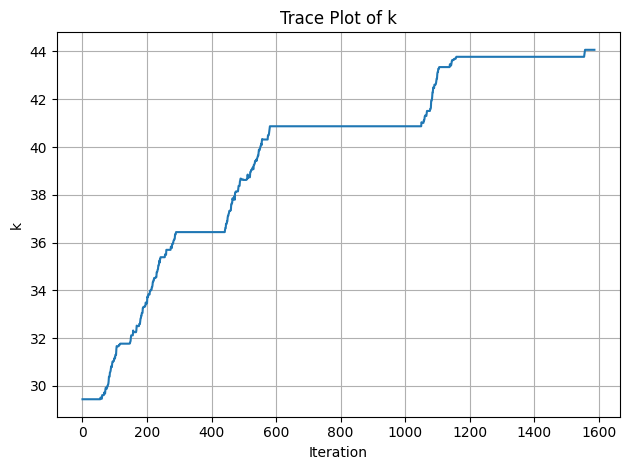

In [22]:
trace_plot_k(full_parameters)